### 7.	Design and implement a neural network to realize different logic gates (XNOR, NAND, XOR, etc.) and implement a back-propagation algorithm for tuning the weights of a neural network. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def initParam(inputFeatures, neurons, outputFeatures):
  w1 = np.random.randn(neurons, inputFeatures)
  w2 = np.random.randn(outputFeatures, neurons)
  b1 = np.zeros((neurons, 1))
  b2 = np.zeros((outputFeatures, 1))

  parameters = {'w1':w1, 'b1':b1,
                'w2':w2, 'b2':b2}
  return parameters

In [ ]:
def forwardProp(X, Y, param):
  m = X.shape[1]
  w1 = param['w1']
  w2 = param['w2']
  b1 = param['b1']
  b2 = param['b2']

  z1 = np.dot(w1,X) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = sigmoid(z2)

  cache = (z1, a1, w1, b1, z2, a2, w2, b1)
  logprobs = np.multiply(np.log(a2), Y) + np.multiply(np.log(1-a2), (1-Y))
  cost = -np.sum(logprobs)/m
  return cost, cache, a2

In [ ]:
def backProp(X, Y, cache):
  m = X.shape[1]
  (z1, a1, w1, b1, z2, a2, w2, b1) = cache

  dz2 = a2 - Y
  dw2 = np.dot(dz2, a1.T)/m
  db2 = np.sum(dz2, axis = 1, keepdims = True)

  da1 = np.dot(w2.T, dz2)
  dz1 = np.multiply(da1, a1 * (1- a1))
  dw1 = np.dot(dz1, X.T) / m
  db1 = np.sum(dz1, axis = 1, keepdims = True) / m
    
  gradients = {"dz2": dz2, "dw2": dw2, "db2": db2,
                "dz1": dz1, "dw1": dw1, "db1": db1}
  return gradients

In [ ]:
def updateParameters(parameters, gradients, learningRate):
    parameters["w1"] = parameters["w1"] - learningRate * gradients["dw1"]
    parameters["w2"] = parameters["w2"] - learningRate * gradients["dw2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [ ]:
#AND
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

In [ ]:
#OR
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 1, 1, 1]]) # OR output

In [ ]:
#NAND
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[1, 1, 1, 0]]) # NAND output

In [ ]:
#NOR
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[1, 0, 0, 0]]) # NOR output

In [ ]:
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initParam(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

In [ ]:
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardProp(X, Y, parameters)
    gradients = backProp(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

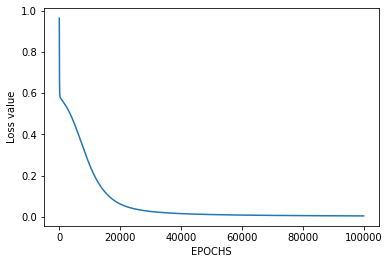

In [ ]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [ ]:
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardProp(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[0. 1. 0. 0.]]
